In [97]:
import sys

sys.path.append('../')

In [98]:
from tests.pareto import Pareto

In [99]:
import numpy as np
import matplotlib.pyplot as plt

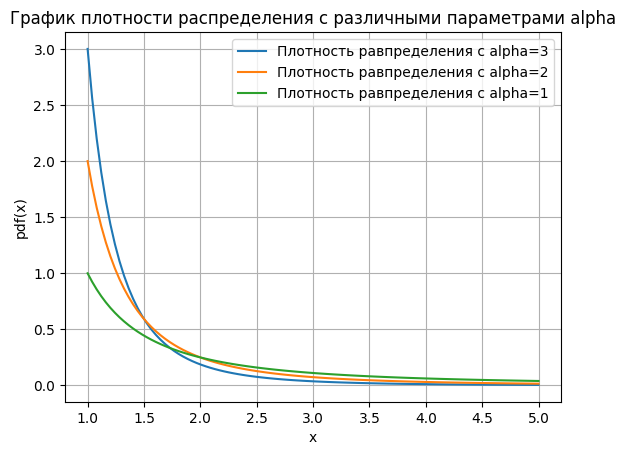

In [5]:
alphas = [3, 2, 1] #shape
x_m = 1            #scale
x = np.linspace(1, 5, 100) 

for alpha in alphas:
    pa = Pareto(alpha, x_m)
    dens = pa.pdf(x)
    plt.plot(x, dens, label=('Плотность равпределения c alpha=' + str(alpha)))
    plt.title('График плотности распределения c различными параметрами alpha' )

plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.grid()
plt.legend()
plt.show()

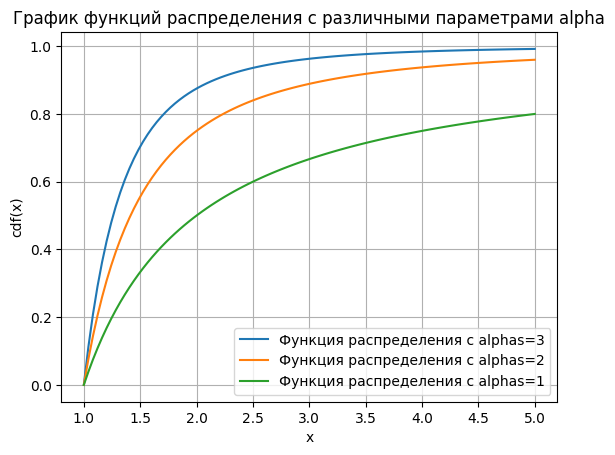

In [6]:
alphas = [3, 2, 1] #shape
x_m = 1            #scale
x = np.linspace(1, 5, 100) 

for alpha in alphas:
    pa = Pareto(alpha, x_m)
    dens = pa.cdf(x)
    plt.plot(x, dens, label=('Функция распределения c alphas=' + str(alpha)))
    plt.title('График функций распределения c различными параметрами alpha' )

plt.xlabel('x')
plt.ylabel('сdf(x)')
plt.grid()
plt.legend()
plt.show()

In [7]:
from src.CharFuncInverter.Bohman import BohmansInverters as bi

Характеристическая функция имеет вид:
$${\displaystyle \alpha (-ix_{\mathrm {m} }t)^{\alpha }\Gamma (-\alpha ,-ix_{\mathrm {m} }t)}$$

In [101]:
import mpmath as mp


class Pareto:
    def __init__(self, shape, scale):
        self.shape = shape
        self.scale = scale

    def cdf(self, x):
        return 1 - (self.scale / x) ** self.shape

    def chr(self, x):
        res =  self.shape * ((-1j * self.scale * x) ** self.shape) * (np.array([mp.gammainc(-self.shape,
                                                                                        a=( -1j * self.scale * y)) for y in x], dtype=complex))
        return res

    def pdf(self, x):
        return self.shape * (self.scale ** self.shape) / (x ** (self.shape + 1))


1.0


/var/folders/rr/t8v6v0js2pv84hw_jl41vsmh0000gn/T/ipykernel_52839/3289096441.py:19: IntegrationWarning: The maximum number of subdivisions (1000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, error = quad(integrand, x_m, np.inf, limit=1000)


1.0
1.0


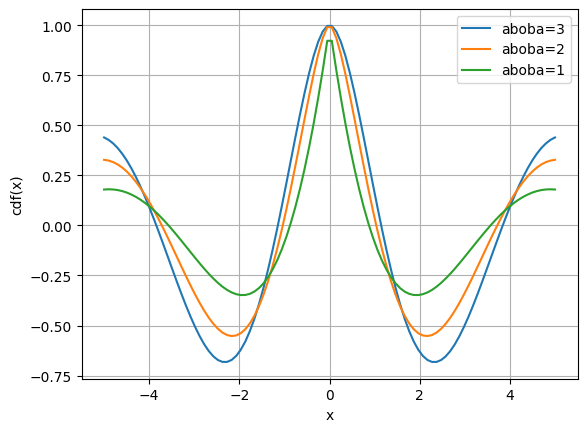

In [92]:
import numpy as np
from scipy.integrate import quad

def characteristic_function_pareto(t, x_m, alpha):
    """
    Вычисляет характеристическую функцию распределения Парето.
    
    :param t: Аргумент для характеристики функции
    :param x_m: Минимальное значение (параметр распределения)
    :param alpha: Параметр формы (альфа)
    :return: Значение характеристической функции
    """
    
    # Определяем интеграл
    def integrand(x):
        return np.exp(1j * t * x) * (alpha * x_m**alpha / x**(alpha + 1))

    # Вычисляем интеграл от x_m до бесконечности
    integral, error = quad(integrand, x_m, np.inf, limit=1000)

    return integral

alphas = [3, 2, 1] #shape
x_m = 1            #scale
x = np.linspace(-5, 5, 100) 

for alpha in alphas:
    pa = Pareto(alpha, x_m)
    dens = np.array([ characteristic_function_pareto(t, x_m, alpha) for t in x])
    print(characteristic_function_pareto(0, x_m, alpha))
    plt.plot(x, dens, label=('aboba=' + str(alpha)))

plt.xlabel('x')
plt.ylabel('сdf(x)')
plt.grid()
plt.legend()
plt.show()

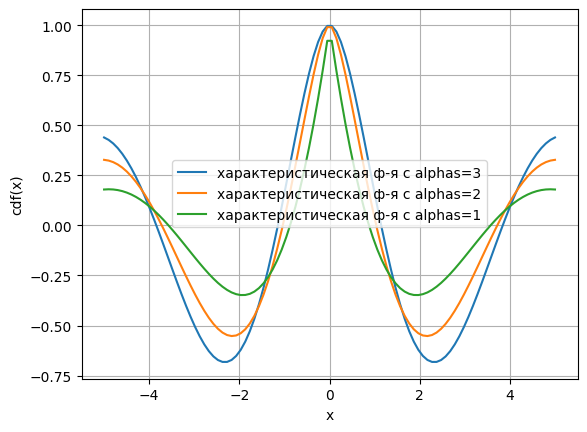

In [77]:
alphas = [3, 2, 1] #shape
x_m = 1            #scale
x = np.linspace(-5, 5, 100) 

for alpha in alphas:
    pa = Pareto(alpha, x_m)
    dens = pa.chr(x)
    plt.plot(x, dens, label=('характеристическая ф-я c alphas=' + str(alpha)))
    
plt.xlabel('x')
plt.ylabel('сdf(x)')
plt.grid()
plt.legend()
plt.show()

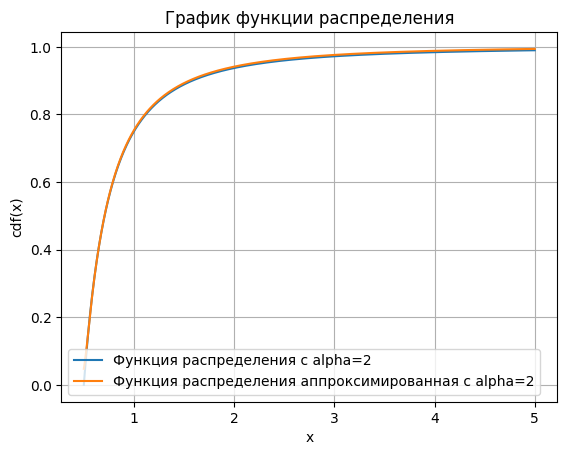

In [106]:
inv = bi.BohmanE()

x_m = 0.5
alpha = 2
pa = Pareto(alpha, x_m)

inv.fit(pa.chr)

x = np.linspace(x_m, 5, 1000) 
cdf_true = pa.cdf(x)
plt.plot(x, cdf_true, label=('Функция распределения с alpha=' + str(alpha)))

cdf_calc = inv.cdf(x)
plt.plot(x, cdf_calc, label=('Функция распределения аппроксимированная c alpha=' + str(alpha)))

plt.title('График функции распределения' )

plt.xlabel('x')
plt.ylabel('сdf(x)')
plt.grid()
plt.legend()
plt.show()


In [108]:
from src.CharFuncInverter.FourierTransform import FTInverter as fi

ValueError: gamma function pole

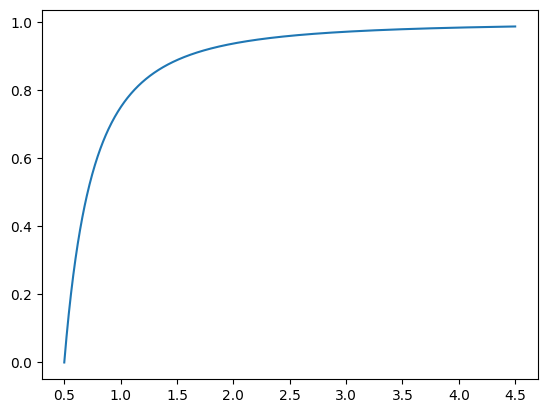

In [111]:
inv = fi.FTInverterNaive()

x_m = 0.5
alpha = 2
pa = Pareto(alpha, x_m)

inv.fit(pa.chr)

x = np.linspace(x_m, 4.5, 1000) 
cdf_true = pa.cdf(x)
plt.plot(x, cdf_true, label=('Функция распределения с alpha=' + str(alpha)))

cdf_calc = inv.cdf(x)
plt.plot(x, cdf_calc, label=('Функция распределения аппроксимированная c alpha=' + str(alpha)))

plt.title('График функции распределения' )

plt.xlabel('x')
plt.ylabel('сdf(x)')
plt.grid()
plt.legend()
plt.show()
